<div style="color:white;display:fill;border-radius:8px;font-size:200%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#fc6603'>AUTHOR: SOBIA ALAMGIR</span></b></p></div>

<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Logistic Regression​</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>

- Logistic Regression is a statistical model used for binary classification that predicts the probability of an outcome (0 or 1) based on input features. It combines a linear equation with the **sigmoid function** to map predictions to a range between 0 and 1.
  
- Instead of guessing heads or tails, it predicts probabilities for two outcomes, like "YES or NO," "SPAM or NOT SPAM," "DISEASE or NO DISEASE."

**The sigmoid function is a mathematical function that maps any input value to a range between 0 and 1, making it perfect for probabilities.**

## Step-01 Load Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import class_likelihood_ratios , confusion_matrix , accuracy_score , classification_report

## Step-02 Load and Explore the dataset

In [2]:
df = pd.read_csv('breast_cancer_data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.shape

(569, 31)

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df['target'].unique()

array([0, 1], dtype=int64)

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [9]:
# check duplicates in the data
df.duplicated().sum()

0

## Step-03 Split the data in `X` and `y`

In [10]:
# split the data into features (X) and target (y)
X = df.drop('target', axis = 1)
y = df['target']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.2 , random_state = 42)

display(X_train)
display(y_train)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,...,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,...,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,...,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,...,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


68     1
181    0
63     1
248    1
60     1
      ..
71     1
106    1
270    1
435    0
102    1
Name: target, Length: 455, dtype: int64

## Step-04 Normalize the data

In [12]:
# To Standardize / Optimize / Normalize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

display(X_train)
display(X_test)

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

array([[-0.4877952 , -0.25088379, -0.46378664, ..., -0.21989091,
         0.23083947,  0.17173277],
       [ 1.37325734,  0.36318719,  1.29254295, ...,  0.93019499,
        -0.58958803, -0.972629  ],
       [ 0.37225845, -0.05148067,  0.38772954, ...,  0.52157274,
        -0.08280128, -0.21536971],
       ...,
       [-0.76105639, -1.08248546, -0.76208585, ..., -0.30042664,
        -0.3893541 , -0.32657562],
       [ 0.01558068,  1.84511495,  0.00969106, ..., -0.50681802,
        -1.76086788, -0.33345979],
       [ 1.88813896,  2.58607883,  1.79246268, ...,  0.73702811,
        -0.02786985, -0.10998887]])

## Step-05 Correlation Matrix / Heat map

                         mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -

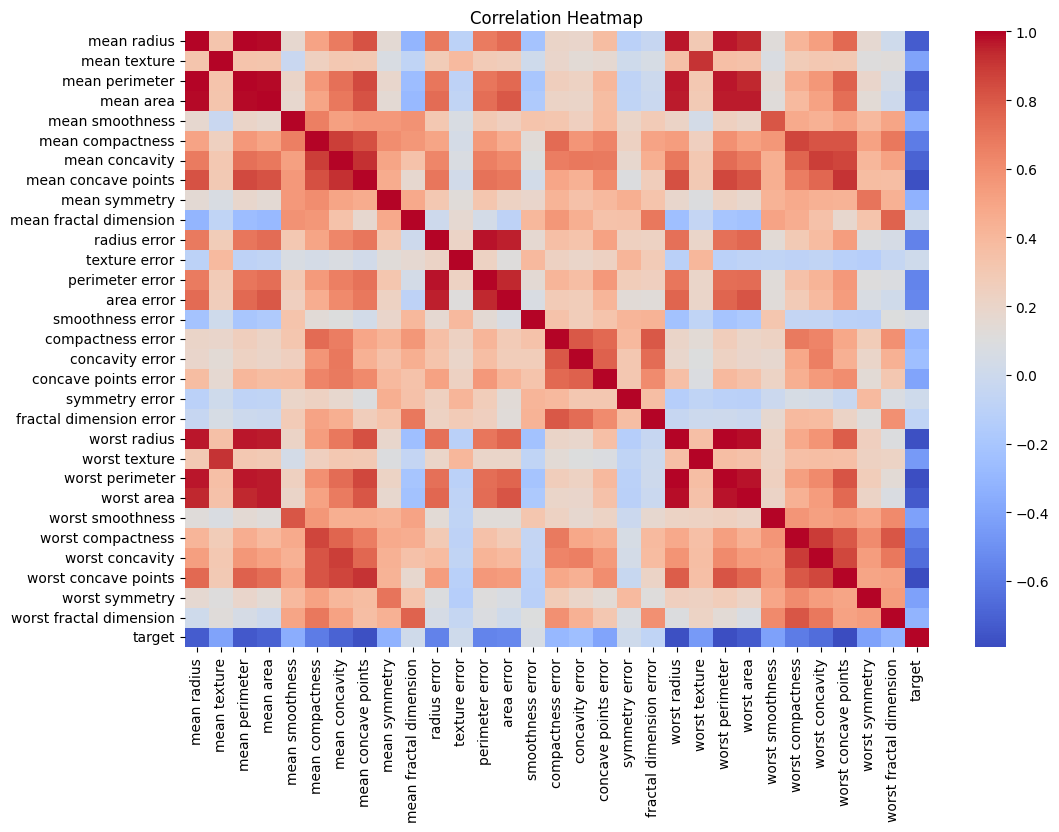

In [13]:
correlation_Matrix = df.corr()
print(correlation_Matrix)
plt.figure(figsize=(12,8))
sns.heatmap(correlation_Matrix , annot=False , cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Step-06 Model Training and Evaluation

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Step-07 Predictions

In [15]:
y_pred = model.predict(X_test)

## Step-08 Evaluation Accuracy

In [16]:
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


## Step-09 Confusion Matrix

`class 0 = not cancer = -ve`

`class 1 = cancer = +ve`

* TP = Actual cancer , Predicted Positive
* FP = Actual not cancer , Predicted Positive

* TN = Actual Not Cancer Predicted Negative
* FN = Actual Cancer Predicted Negative

In [17]:
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[41,  2],
       [ 0, 71]], dtype=int64)

## Step-10 Classification Report

In [18]:
classification_report = classification_report(y_test,y_pred)
print('Classification Report:')
print(classification_report)
                                            

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [19]:
#Problem:
input = ['apple', 'banana','mango','apple','peach','peach', 'peach']
output= {'apple':2 , 'banana':1 , 'mango':1 , 'peach':3}

Emp_dict = {}
Emp_list = []
count = 0

for i in input:
    keys = i
    values = input.count(i)
    Emp_dict[i] = values      

print(Emp_dict)

{'apple': 2, 'banana': 1, 'mango': 1, 'peach': 3}


In [20]:
# output ={}
# for x in input:
#     keys = x
#     values = input.count(x)
#     output[keys] = values
# print(output)

In [ ]:
# Problem: write a function to check if a string in plaindrome or not e.g.
# "madam" True
# "Hello" False
# "civic"   True

# def plaindrome(check_string):
#     length = len(check_string)
#     print(length)
    
#     if (length == 5) and (check_string[0] == check_string[-1]) and (len[1] == len[-2]):
#         return True
    
#     elif (length == 7) and (check_string[0] == check_string[-1]) and (len[1] == len[-2]) and (len[2] == len[-3]):
#         return True
    
#     else : 
#         return False

    # if (check_string[0] == check_string[-1]) and (check_string[1] == check_string[-2]):
    #     return True
    # else:
    #     return False
    #for i in check_string: 
    #print(check_string[-2])



# print(plaindrome('madam'))

5


TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
# input = [1,2,3,5,6,7,10]
# output = [4,8,9] Print all the missing numbers

list = [1,2,3,5,6,7,10]
Emp_list = []
count = 0

for i in range(min(list), max(list)+1):
    if i not in list:
        Emp_list.append(i)
print(Emp_list)

  

[4, 8, 9]


<a id="13"></a>
<h1 style="background-color:#435420;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;color:#FF9900;">Thanks For Reading My Notebook!​</h1>
<figcaption style="text-align: center;">
    <strong>
    </strong>
</figcaption>